In [1]:
import pandas as pd
import numpy as np
import pdb, argparse
import os, pdb, math, itertools
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from kdutils.macro2 import *

In [5]:
method = 'cicso0'
instruments = 'ims'
period = 5
name = 'linear'
task_id = str(INDEX_MAPPING[INSTRUMENTS_CODES[instruments]])

In [6]:
dirs = os.path.join(base_path, method, instruments, 'temp', "model", task_id,
                    str(period))

In [7]:
filename = os.path.join(dirs, "{0}_predict_data.feather".format(name))

In [8]:
predict_data = pd.read_feather(filename)
predict_data.head()

,trade_time,code,predict,nxt1_ret_5h
0,2024-12-05 10:20:00,IM,-5.284011,-0.001860
1,2024-12-05 10:21:00,IM,-6.157190,-0.000716
2,2024-12-05 10:22:00,IM,-2.766501,-0.001164
3,2024-12-05 10:23:00,IM,0.370487,-0.000192
4,2024-12-05 10:24:00,IM,1.448596,-0.000006


In [15]:
is_on_mark = predict_data['trade_time'].dt.minute % int(period) == 0
predict_data = predict_data[is_on_mark]
predict_data.replace([np.inf, -np.inf], np.nan, inplace=True)
predict_data.dropna(inplace=True)
predict_data.head()

,trade_time,code,predict,nxt1_ret_5h
10,2024-12-05 10:30:00,IM,-1.949980,0.003050
25,2024-12-05 10:45:00,IM,0.869630,0.000592
40,2024-12-05 11:00:00,IM,-4.496536,0.000543
55,2024-12-05 11:15:00,IM,-4.186338,-0.001194
70,2024-12-05 11:30:00,IM,-2.803046,-0.001351


In [16]:
from lib.cux001 import FactorEvaluate1

In [17]:
evaluate1 = FactorEvaluate1(factor_data=predict_data,
                                factor_name='predict',
                                ret_name='nxt1_ret_{0}h'.format(period),
                                roll_win=240,
                                fee=0.000,
                                scale_method='roll_zscore',
                                expression=name)

In [18]:
stats_dt = evaluate1.run()

In [19]:
stats_dt

{'total_ret': 0.0368907760333661,
 'avg_ret': 4.756976842922901e-05,
 'max_dd': -0.01684317625202547,
 'calmar': 2.1902505490275215,
 'sharpe1': 0.07272956794288604,
 'sharpe2': 3.0618002554230213,
 'turnover': 0.3767255003527592,
 'win_rate': 0.4039800995024876,
 'profit_ratio': 1.2627014882847463,
 'ic_mean': 0.07994798963634175,
 'ic_std': 0.07262474551222606,
 'ic_ir': 1.1008367612507897,
 'factor_autocorr': 0.02430643902768428,
 'ret_autocorr': 0.00509520691335663}

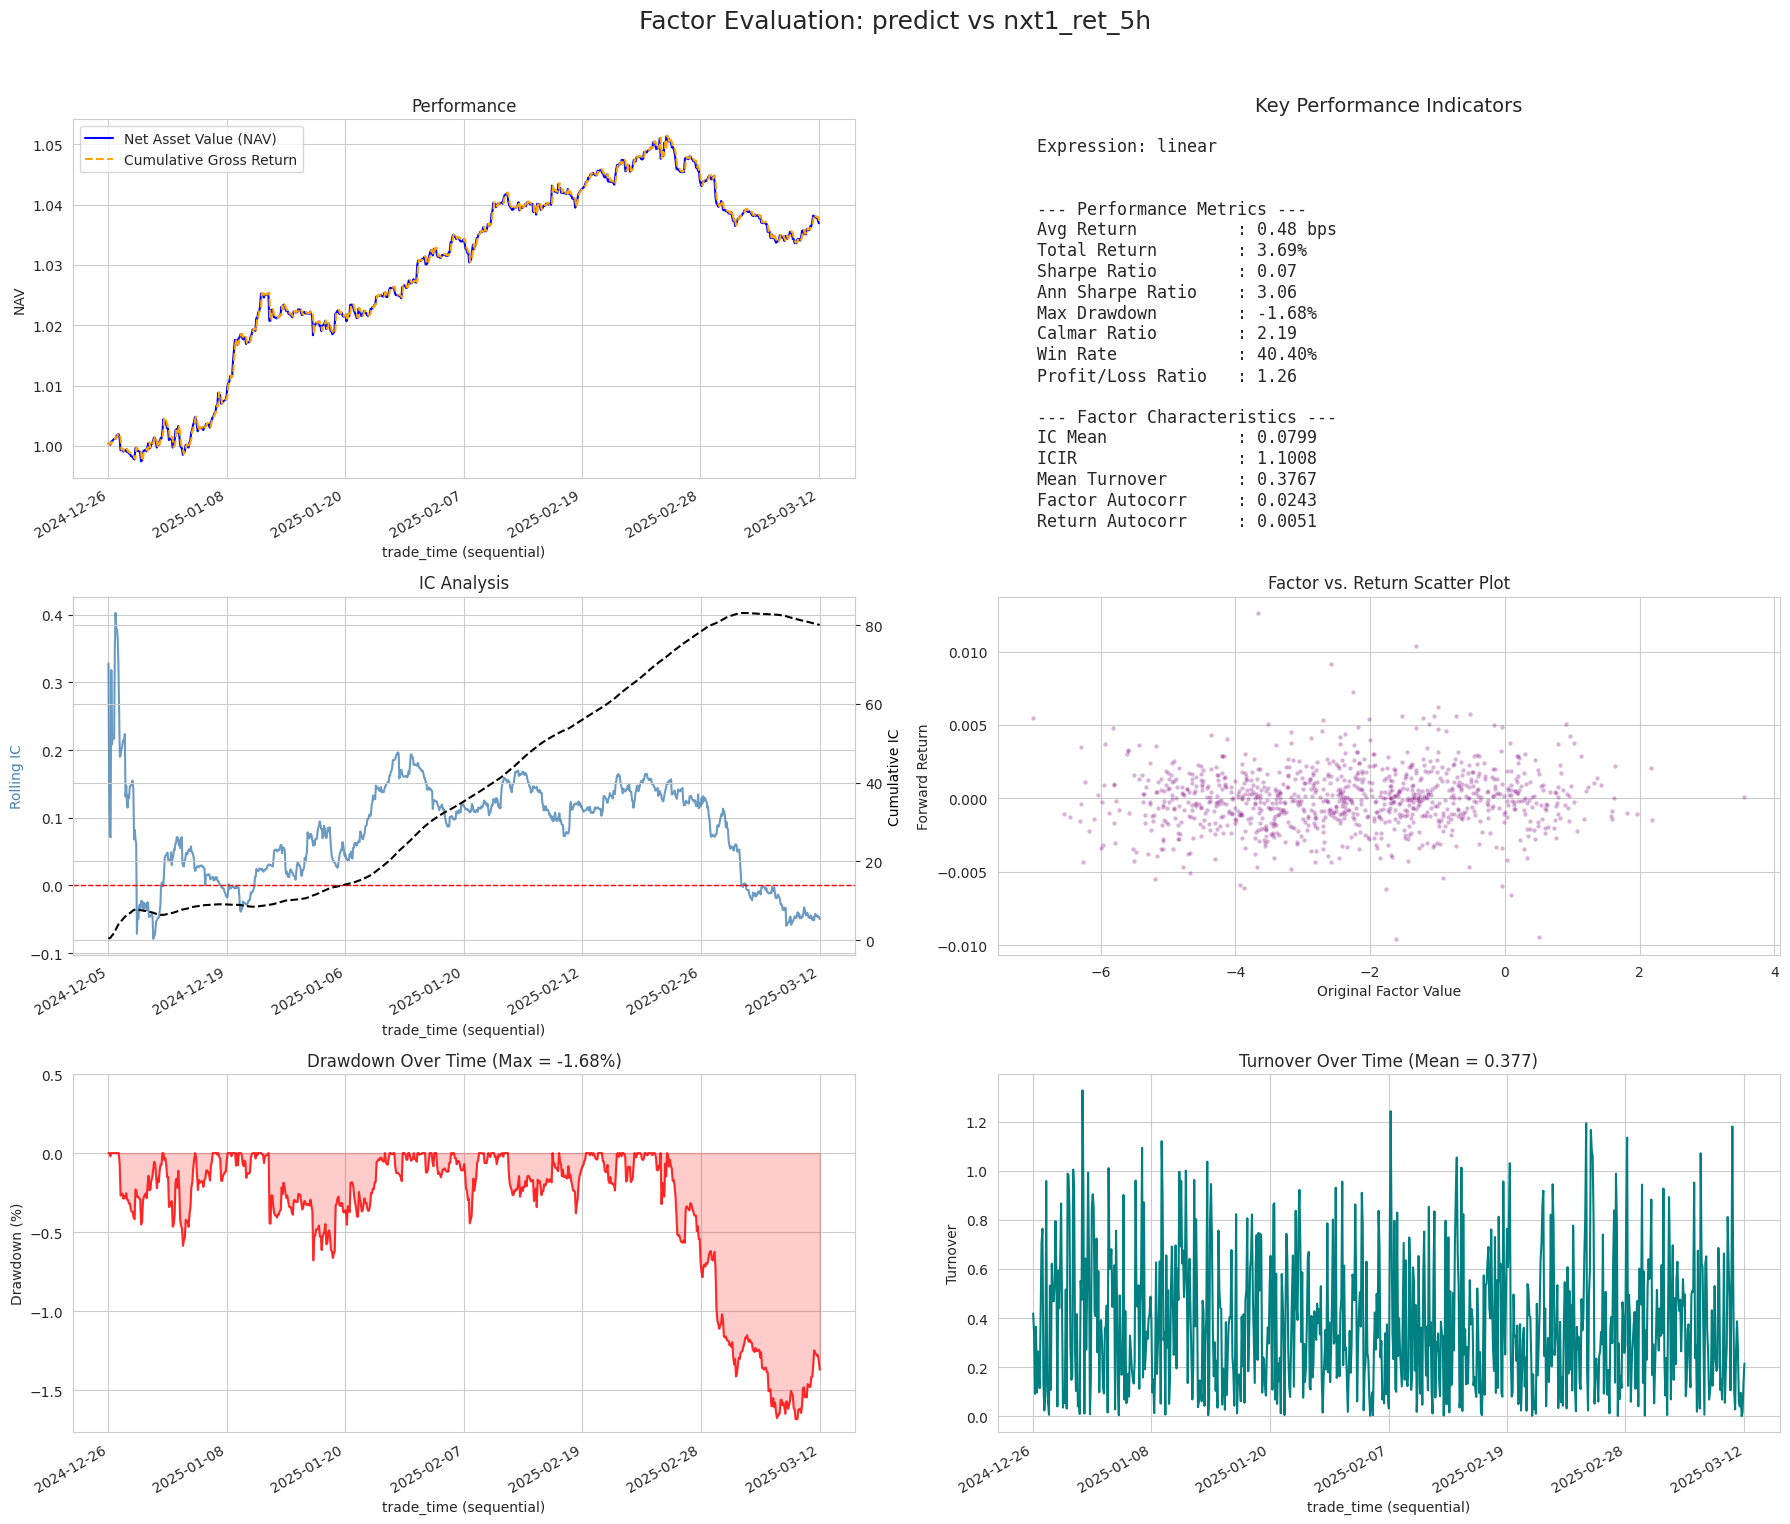

In [20]:
evaluate1.plot_results()